# Redes Convolucionales / Reducción de Dimensionalidad y Benchmarking de Modelos (Core)

Descripción

Reducción de Dimensionalidad y Benchmarking de Modelos (Core)

Descripción:

En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.



Objetivo:

El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.



Instrucciones:

1. Selección del dataset:
- Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
- Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

2. Reducción de dimensionalidad:
- Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
- Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
- Utiliza las características reducidas para simplificar el conjunto de datos.

3. Benchmarking de modelos:
- Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
- Regresión logística
- Árboles de decisión
- Random Forest
-  Support Vector Machines (SVM)
- Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

4. Análisis comparativo de modelos:
- Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
- Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

5. Informe final:
- Elabora un informe detallado que incluya:
    - El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
    - Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
    - Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

In [2]:
#Importo las librerías que necesito
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart_failure_clinical_records_dataset.csv')
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [5]:
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [6]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
#Utilizaré pipeline para el preprocesamiento
#Ya lo utilicé en proyectos anteriores y estoy muy familiarizado con su uso

#Selecciono la variable objetivo y la separo
X = df.drop('DEATH_EVENT', axis = 1) #Con esto selecciono todas las columnas, excepto  DEATH_EVENT
y = df['DEATH_EVENT'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

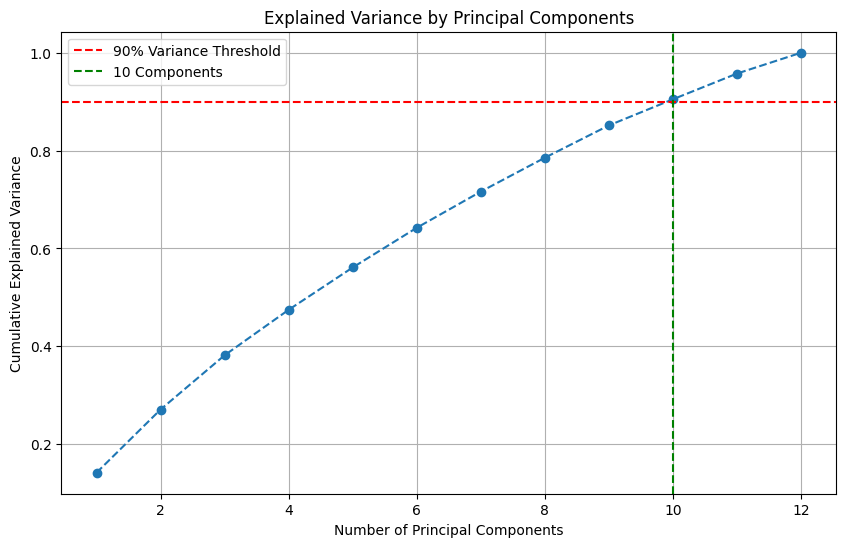

np.int64(10)

In [9]:
#Ahora aplico la reducción
from sklearn.decomposition import PCA

# PCA sin especificar el número de componentes
pca = PCA()

# Crear el pipeline incluyendo PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train)

#Varianza explicada acumulada
explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_.cumsum()

#Número de componentes necesarios
components_needed = (explained_variance_ratio >= 0.90).argmax() + 1

#Gráfico de la varianza
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'{components_needed} Components')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

components_needed

In [10]:
from sklearn.decomposition import PCA

# Añadimos PCA al pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10))  
])

# Ajustar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [11]:
# Extraer el modelo PCA ajustado del pipeline
pca_model = pipeline.named_steps['pca']

# Obtener los coeficientes (componentes principales)
pca_components = pca_model.components_

# Crear un DataFrame para visualizar la influencia de cada variable en los componentes principales
pca_df = pd.DataFrame(
    pca_components,
    columns=num_columns.tolist() + cat_columns.tolist(),
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
)

print("Influencia de Variables en los Componentes Principales:")
print(pca_df)

Influencia de Variables en los Componentes Principales:
           age   anaemia  creatinine_phosphokinase  diabetes  \
PC1  -0.071777 -0.292218                  0.226687 -0.263512   
PC2  -0.471049 -0.219827                  0.107921  0.216674   
PC3   0.132344  0.191958                 -0.029927 -0.388983   
PC4   0.183854 -0.288467                  0.650550 -0.254613   
PC5   0.220771 -0.435415                  0.006697  0.228256   
PC6   0.271619  0.111613                 -0.459387 -0.104005   
PC7  -0.316857 -0.456926                 -0.190772 -0.025978   
PC8   0.160544  0.099267                  0.247133  0.662987   
PC9   0.606646 -0.440151                 -0.168891 -0.053224   
PC10  0.018395 -0.261895                 -0.328569  0.302882   

      ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
PC1           -0.209925            -0.214177  -0.169417         -0.095975   
PC2            0.183802            -0.213691   0.240461         -0.358083   
PC3     

In [12]:
# De 12 pasamos a 10 para mantener el 90% de la variabilidad original
#Ahora ya puedo aplicar los modelos predictivos

In [13]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), #Con esto llamo al preprocesamiento hecho más arriba
    ('pca', PCA(n_components=10)),
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

#Puedo hacer un diccionario para que sea más facil mostrarlo
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74        35
           1       0.64      0.28      0.39        25

    accuracy                           0.63        60
   macro avg       0.63      0.58      0.56        60
weighted avg       0.63      0.63      0.59        60

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63        35
           1       0.42      0.32      0.36        25

    accuracy                           0.53        60
   macro avg  

In [15]:
#Ahora optimizaré para ver si puedo mejorar y elegir el mejor modelo
from sklearn.model_selection import GridSearchCV
# Parámetros 
param_grid_LR = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

param_grid_KNN = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

param_grid_DT = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
}

param_grid_RF = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_XGB = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

#Hago el GridSearch para cada modelo
grid_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, scoring='accuracy')
grid_KNN = GridSearchCV(pipeline_KNN, param_grid_KNN, cv=5, scoring='accuracy')
grid_DT = GridSearchCV(pipeline_DT, param_grid_DT, cv=5, scoring='accuracy')
grid_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=5, scoring='accuracy')
grid_XGB = GridSearchCV(pipeline_XGB, param_grid_XGB, cv=5, scoring='accuracy')

#Ahora entreno los modelos
grid_LR.fit(X_train, y_train)
grid_KNN.fit(X_train, y_train)
grid_DT.fit(X_train, y_train)
grid_RF.fit(X_train, y_train)
grid_XGB.fit(X_train, y_train)

#Ahora veo los mejores parametros
print("Best parameters for Logistic Regression:", grid_LR.best_params_)
print("Best cross-validated accuracy for Logistic Regression:", round(grid_LR.best_score_, 4))

print("Best parameters for K-Nearest Neighbors:", grid_KNN.best_params_)
print("Best cross-validated accuracy for K-Nearest Neighbors:", round(grid_KNN.best_score_, 4))

print("Best parameters for Decision Tree:", grid_DT.best_params_)
print("Best cross-validated accuracy for Decision Tree:", round(grid_DT.best_score_, 4))

print("Best parameters for Random Forest:", grid_RF.best_params_)
print("Best cross-validated accuracy for Random Forest:", round(grid_RF.best_score_, 4))

print("Best parameters for XGBoost:", grid_XGB.best_params_)
print("Best cross-validated accuracy for XGBoost:", round(grid_XGB.best_score_, 4))


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.8327
Best parameters for K-Nearest Neighbors: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best cross-validated accuracy for K-Nearest Neighbors: 0.7571
Best parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 10}
Best cross-validated accuracy for Decision Tree: 0.7657
Best parameters for Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validated accuracy for Random Forest: 0.8034
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.6}
Best cross-validated accuracy for 

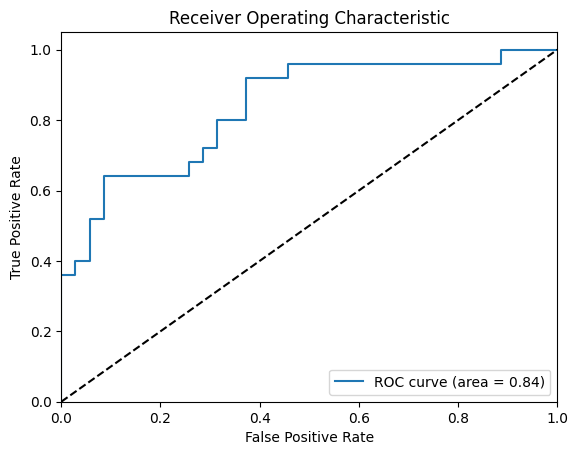

In [16]:
#El mejor modelo luego de la optimización es el Logistic Regression con un rendimiento del 83.27%
#Tener en cuenta que esto es sin eliminar posibles outliers
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predecir probabilidades con el modelo Logistcic Regression optimizado
y_pred_prob = grid_LR.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
#Calculo la curva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Calculo AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusión
Viendo y comparando todos los modelos. Puedo decir que el Logistic Regression es el mejor modelo porque tiene un buen equilibrio entre precisión y capacidad de discriminación. Es un modelo que se interpreta muy bien, eso facilita entender que factores influyen en las predicciones. 

Tiene un buen rendimiento después de su optimización.

Para un escenario real es importante para predecir el riesgo de fallecimiento. La alta precisión asegura que los casos positivos identificados son correctos. Es eficiente computacionalmente y no requiere grandes recursos para entrenar y desplegar.